<a href="https://colab.research.google.com/github/RaMarWilson1/GenAI/blob/main/HW2/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1573376   
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 1707274 (6.51 MB)
Trainable params: 1707

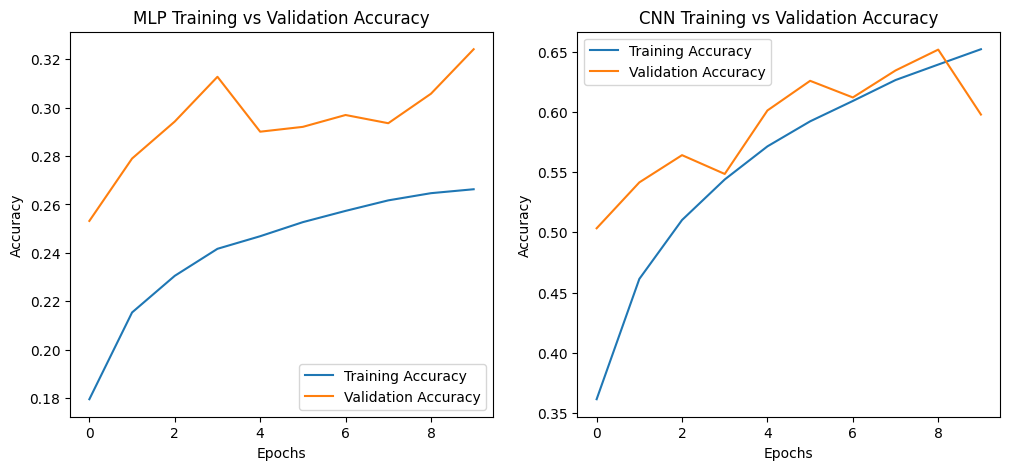

MLP Test Accuracy: 0.3269, MLP Test Loss: 1.9073
CNN Test Accuracy: 0.5935, CNN Test Loss: 1.1583


In [2]:
#  Comparing MLP and CNN on CIFAR-10 Dataset

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers, datasets

## 0. Parameters

NUM_CLASSES = 10  # Number of classes in the CIFAR-10 dataset

## 1. Prepare the Data

# Load and normalize the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to [0,1] range
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# No need for one-hot encoding, using sparse categorical crossentropy

## 2. Build the MLP Model

def create_mlp_model(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))  # Flatten the input
    model.add(layers.Dense(512, activation="relu"))  # First dense layer with ReLU activation
    model.add(layers.Dropout(0.5))  # Add Dropout to prevent overfitting
    model.add(layers.Dense(256, activation="relu"))  # Second dense layer with ReLU activation
    model.add(layers.Dropout(0.5))  # Add Dropout to prevent overfitting
    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))  # Output layer with softmax activation

    return model

# Create and summarize the MLP model
mlp_model = create_mlp_model((32, 32, 3))
mlp_model.summary()

## 3. Train the MLP Model

# Compile the model
opt = optimizers.Adam(learning_rate=0.0005)
mlp_model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

# Train the MLP model
mlp_history = mlp_model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=10, shuffle=True)

## 4. Build the CNN Model (with Strides)

def create_cnn_model(input_shape):
    model = models.Sequential()

    # First Conv Layer with Strides
    model.add(layers.Conv2D(32, (3, 3), strides=2, padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Second Conv Layer
    model.add(layers.Conv2D(64, (3, 3), strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation="relu"))  # Fully connected layer with ReLU activation
    model.add(layers.Dropout(0.5))  # Add Dropout to prevent overfitting
    model.add(layers.Dense(NUM_CLASSES, activation="softmax"))  # Output layer with softmax activation

    return model

# Create and summarize the CNN model
cnn_model = create_cnn_model((32, 32, 3))
cnn_model.summary()

## 5. Train the CNN Model

# Compile the CNN model
opt = optimizers.Adam(learning_rate=0.0005)
cnn_model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

# Train the CNN model
cnn_history = cnn_model.fit(x_train, y_train, validation_split=0.2, batch_size=32, epochs=10, shuffle=True)

## 6. Evaluation

# Evaluate the MLP model
print("MLP Model Evaluation:")
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(x_test, y_test)

# Evaluate the CNN model
print("\nCNN Model Evaluation:")
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test, y_test)

## 7. Plotting Results

# Plot Training & Validation Accuracy for MLP
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MLP Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Training & Validation Accuracy for CNN
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




# Performance Comparison
print(f"MLP Test Accuracy: {mlp_test_acc:.4f}, MLP Test Loss: {mlp_test_loss:.4f}")
print(f"CNN Test Accuracy: {cnn_test_acc:.4f}, CNN Test Loss: {cnn_test_loss:.4f}")
